### Importing libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.express as px
from IPython.display import Image
import plotly.io as pio
%matplotlib inline
import warnings
sns.set()
import sys
import os

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

### Data Reading

In [3]:
sys.path.append(os.path.abspath(os.path.join('..\scripts')))


from data_explore import Explore_Data
from clean_data import Clean_data
from outlier import Outlier
from overview import OverView
from file_handler import FileHandler


2022-05-26 22:45:44,804 — Explore Data — DEBUG — Loaded successfully!
2022-05-26 22:45:44,818 — Clean Data — DEBUG — Loaded successfully!


In [4]:
file_handler = FileHandler()

In [5]:

data_store = pd.read_csv('../data/store.csv') 
data_train = pd.read_csv('../data/train.csv', parse_dates = True, low_memory = False, index_col = 'Date')
data_test = pd.read_csv('../data/test.csv', parse_dates = True, low_memory = False, index_col = 'Date')

#### Train data exploration

In [6]:
print(Explore_Data(data_train))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


None

---


First 5 rows


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


---


Shape of the dataset


(1017209, 8)

---


Missing values count


Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

#### Store Data Exploration

In [7]:
print(Explore_Data(data_store))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


None

---


First 5 rows


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


---


Shape of the dataset


(1115, 10)

---


Missing values count


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Clean Data

In [8]:
cleaner = Clean_data()

#### Missing Values


Train data set has no null values.
from the Store dataset CompetitionDistance has 3 missing values. they are small we can impute them with media.


In [9]:
data_store = cleaner.fill_with_mean(data_store,['CompetitionDistance'])

In [10]:
print(Explore_Data(data_store))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


None

---


First 5 rows


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


---


Shape of the dataset


(1115, 10)

---


Missing values count


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

from the Store data CompetitionOpenSinceMonth and CompetitionOpenSinceYear have 354 missing values ,let's explore them first


In [11]:
print(np.sort(data_store['CompetitionOpenSinceMonth'].unique()))
print(np.sort(data_store['CompetitionOpenSinceYear'].unique()))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. nan]
[1900. 1961. 1990. 1994. 1995. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]


As we can see above the competitionOpenSinceMonth and competitionOpenSinceYear hold the month and year when new competition opened. Since there is competitionalDistance for all columns the time when new competition is started. having a null value for both competitionOpenSinceYear and competitionOpenSinceMonth is meaning full. It means competition for a store has already been there before the store is established. 

The longest time we have in the dataset is 1900. So I have replaced the None values with the first month 1990.

In [12]:
data_store['CompetitionOpenSinceMonth'] = data_store['CompetitionOpenSinceMonth'].fillna(1)
data_store['CompetitionOpenSinceYear'] = data_store['CompetitionOpenSinceYear'].fillna(1990)

Now we are left with Promo2SinceWeek , Promo2SinceYear and PromInterva.
Let's check the missing persentage 

In [13]:
cleaner.percent_missing(data_store)

'14.64'

Let's look into what data they are holding.

In [14]:
print(np.sort(data_store['Promo2SinceWeek'].unique()))
print(np.sort(data_store['Promo2SinceYear'].unique()))
print(data_store['PromoInterval'].unique())

[ 1.  5.  6.  9. 10. 13. 14. 18. 22. 23. 26. 27. 28. 31. 35. 36. 37. 39.
 40. 44. 45. 48. 49. 50. nan]
[2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [15]:
data_store[data_store['Promo2'] == 0][['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].head(5)

,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN


From the above table we can see that the three columns depends on Promo2. the reason for missing the value is becouse Prom2 is equal to 0. The problem is we can not store this information in a month or a year. So we will create a new column holding if the store participated in promo2. Then we can replace Promo2SinceYear and Promo2SinceWeek with the earliest month and week.

In [16]:
print(pd.isnull(data_store['PromoInterval'][0]))

True


Now let's replace the missing value of Promo2SinceWeek and Promo2SinceYear with 0.

In [17]:
data_store['Promo2SinceWeek'] = data_store['Promo2SinceWeek'].fillna(0)
data_store['Promo2SinceYear'] = data_store['CompetitionOpenSinceYear'].fillna(0)

from the above info we can see that the only column with null value is PromoInteral. 

The PromotionInteral have 4 enties.Let's split those points into 4 

In [18]:
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
def getMonth(months, index):
    if(months == 0):
        return 0

    month = months.split(',')[index]
    return month_abbr.index(month)+1

In [19]:
data_store['PromoInterval'] = data_store['PromoInterval'].fillna(0)
data_store['PromoInterval0'] = data_store.PromoInterval.apply((lambda x: getMonth(x, 0)))
data_store['PromoInterval1'] = data_store.PromoInterval.apply((lambda x: getMonth(x, 1)))
data_store['PromoInterval2'] = data_store.PromoInterval.apply((lambda x: getMonth(x, 2)))
data_store['PromoInterval3'] = data_store.PromoInterval.apply((lambda x: getMonth(x, 3)))
data_store = cleaner.drop_columns(data_store, ['PromoInterval'])

In [20]:
cleaner.percent_missing(data_store)

'0.0'

In [21]:
data_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval0               0
PromoInterval1               0
PromoInterval2               0
PromoInterval3               0
dtype: int64

Let's now close stores with zero sales

In [22]:
data_train[(data_train.Open==0) & (data_train.Sales==0)].shape

(172817, 8)

There are1723817 stores that are closed and has no sales. To avoid biase forecast we will drop thsi values.

Let now check Open stories with 0 sales

In [23]:
data_train[(data_train.Open !=0) &(data_train.Sales==0)].shape

(54, 8)

54 stores are opened and has no sales. 54 is small number compared to the dataset, we will consider this as exceptional.

In [24]:
data_train = data_train[(data_train.Open != 0) & (data_train.Sales != 0)]
data_train.shape

(844338, 8)

As we can see in the output of the above , 844338 stores are open and has sales.

### Outlier Treating

Let's start with the train data. 

In [25]:
df_outliers = Outlier(data_train[['Sales', 'Customers']].copy())
overview = df_outliers.getOverview()
overview

,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean,lower,upper
label,,,,,,,,,,,,
Sales,4859.00,6369.00,8360.00,3501.00,1.59,30769,3.64%,46.00,41551.00,6955.96,-392.50,13611.50
Customers,519.00,676.00,893.00,374.00,2.79,40853,4.84%,8.00,7388.00,762.78,-42.00,1454.00


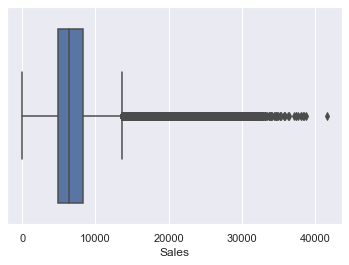

In [26]:
sns.boxplot(data_train.Sales)

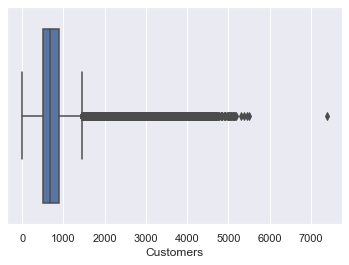

In [27]:
sns.boxplot(data_train.Customers)

lets's treating the outliers on the training data set

we will remove the outliers from the traning dataset using Interquartile Range

In [28]:
df_outliers = Outlier(data_train)
df_outliers.replace_outliers_with_iqr(['Sales', 'Customers'])
df_train = df_outliers.df

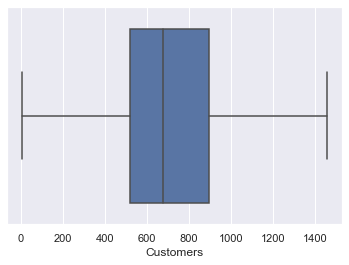

In [29]:
sns.boxplot(data_train.Customers)

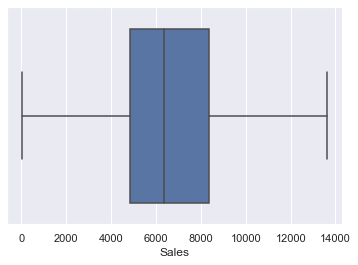

In [30]:
sns.boxplot(data_train.Sales)

Let's now treat store data. 

In [31]:
df_outliers = Outlier(data_store[['CompetitionDistance']].copy())
overview = df_outliers.getOverview()
overview

,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean,lower,upper
label,,,,,,,,,,,,
CompetitionDistance,720.00,2330.00,6875.00,6155.00,2.93,108,9.69%,20.00,75860.00,5404.90,-8512.50,16107.50


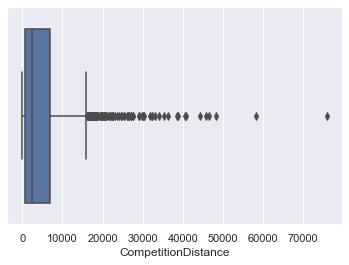

In [32]:
sns.boxplot(data_store.CompetitionDistance)

In [33]:
df_outliers = Outlier(data_store)
df_outliers.replace_outliers_with_iqr(['CompetitionDistance'])
data_store = df_outliers.df

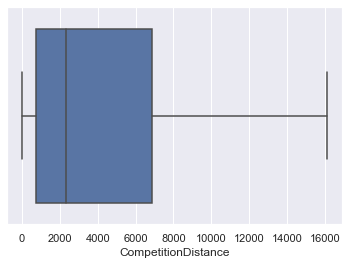

In [34]:
sns.boxplot(data_store.CompetitionDistance)

### Fix Data Types

#### Data_train

In [35]:
print("Unique data points in StateHoliday", data_store['StoreType'].unique())
print("Unique data points in StateHoliday", data_store['Assortment'].unique())
print("Unique data points in StateHoliday", data_train['StateHoliday'].unique())

Unique data points in StateHoliday ['c' 'a' 'd' 'b']
Unique data points in StateHoliday ['a' 'c' 'b']
Unique data points in StateHoliday ['0' 'a' 'b' 'c']


As we can see StateHoliday let's investigate it. Let's look at the unique values

In [36]:
data_train['StateHoliday'].value_counts()

0    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [37]:
data_train['StateHoliday'].value_counts().index

Index(['0', 'a', 'b', 'c'], dtype='object')

Here we can see that O which is integer and the other are string. So let's convert the StateHoliday column into string.

In [38]:
cleaner.convert_to_string(data_train,['StateHoliday'])


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263.00,555.00,1,1,0,1
2015-07-31,2,5,6064.00,625.00,1,1,0,1
2015-07-31,3,5,8314.00,821.00,1,1,0,1
2015-07-31,4,5,13611.50,1454.00,1,1,0,1
2015-07-31,5,5,4822.00,559.00,1,1,0,1
...,...,...,...,...,...,...,...,...
2013-01-01,682,2,3375.00,566.00,1,0,a,1
2013-01-01,733,2,10765.00,1454.00,1,0,a,1
2013-01-01,769,2,5035.00,1248.00,1,0,a,1


In [39]:
data_train.dtypes

Store              int64
DayOfWeek          int64
Sales            float64
Customers        float64
Open               int64
Promo              int64
StateHoliday      string
SchoolHoliday      int64
dtype: object

Now let us convert the date data to datetime format

In [40]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844338 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          844338 non-null  int64  
 1   DayOfWeek      844338 non-null  int64  
 2   Sales          844338 non-null  float64
 3   Customers      844338 non-null  float64
 4   Open           844338 non-null  int64  
 5   Promo          844338 non-null  int64  
 6   StateHoliday   844338 non-null  string 
 7   SchoolHoliday  844338 non-null  int64  
dtypes: float64(2), int64(5), string(1)
memory usage: 58.0 MB


In [41]:
clean_train_data =cleaner.drop_duplicate(data_train)
clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 824541 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          824541 non-null  int64  
 1   DayOfWeek      824541 non-null  int64  
 2   Sales          824541 non-null  float64
 3   Customers      824541 non-null  float64
 4   Open           824541 non-null  int64  
 5   Promo          824541 non-null  int64  
 6   StateHoliday   824541 non-null  string 
 7   SchoolHoliday  824541 non-null  int64  
dtypes: float64(2), int64(5), string(1)
memory usage: 56.6 MB


#### Data_store

Check if there is any mixed data types.

In [42]:
cleaner.show_cols_mixed_dtypes(data_store)

None of the columns contain mixed types.


In [43]:
clean_store_data =cleaner.drop_duplicate(data_store)
clean_store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,c,a,1270.00,9.00,2008.00,0,0.00,2008.00,0,0,0,0
1,2,a,a,570.00,11.00,2007.00,1,13.00,2007.00,1,4,7,10
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2006.00,1,4,7,10
3,4,c,c,620.00,9.00,2009.00,0,0.00,2009.00,0,0,0,0
4,5,a,a,16107.50,4.00,2015.00,0,0.00,2015.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.00,6.00,2014.00,1,31.00,2014.00,1,4,7,10
1111,1112,c,c,1880.00,4.00,2006.00,0,0.00,2006.00,0,0,0,0
1112,1113,a,c,9260.00,1.00,1990.00,0,0.00,1990.00,0,0,0,0
1113,1114,a,c,870.00,1.00,1990.00,0,0.00,1990.00,0,0,0,0


#### Data_test

Check if there is any mixed data types.

In [44]:
clean_test_data = cleaner.drop_duplicate(data_test)
clean_test_data

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.00,1,0,0
2015-09-17,2,3,4,1.00,1,0,0
2015-09-17,3,7,4,1.00,1,0,0
2015-09-17,4,8,4,1.00,1,0,0
2015-09-17,5,9,4,1.00,1,0,0
...,...,...,...,...,...,...,...
2015-08-01,41084,1111,6,1.00,0,0,0
2015-08-01,41085,1112,6,1.00,0,0,0
2015-08-01,41086,1113,6,1.00,0,0,0


In [45]:
clean_test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Open           41077 non-null  float64
 4   Promo          41088 non-null  int64  
 5   StateHoliday   41088 non-null  object 
 6   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.5+ MB


## Feature Engineering


#### Data Extraction

### Train Data

In [46]:
clean_train_data['year'] = clean_train_data.index.year
clean_train_data['month'] = clean_train_data.index.month
clean_train_data['day'] = clean_train_data.index.day
clean_train_data['weekOfYear'] = clean_train_data.index.weekofyear
clean_train_data['dayOfWeek'] = clean_train_data.index.dayofweek

In [47]:
clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 824541 entries, 2015-07-31 to 2013-01-01
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          824541 non-null  int64  
 1   DayOfWeek      824541 non-null  int64  
 2   Sales          824541 non-null  float64
 3   Customers      824541 non-null  float64
 4   Open           824541 non-null  int64  
 5   Promo          824541 non-null  int64  
 6   StateHoliday   824541 non-null  string 
 7   SchoolHoliday  824541 non-null  int64  
 8   year           824541 non-null  int64  
 9   month          824541 non-null  int64  
 10  day            824541 non-null  int64  
 11  weekOfYear     824541 non-null  int64  
 12  dayOfWeek      824541 non-null  int64  
dtypes: float64(2), int64(10), string(1)
memory usage: 88.1 MB


In [48]:
clean_store_data.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
223,224,d,c,7930.00,1.00,1990.00,1,1.00,1990.00,1,4,7,10
284,285,a,a,2410.00,1.00,1990.00,0,0.00,1990.00,0,0,0,0
964,965,a,c,110.00,1.00,1990.00,0,0.00,1990.00,0,0,0,0
431,432,a,a,810.00,5.00,2013.00,0,0.00,2013.00,0,0,0,0
623,624,a,c,6920.00,9.00,2011.00,0,0.00,2011.00,0,0,0,0
54,55,a,a,720.00,11.00,2004.00,0,0.00,2004.00,0,0,0,0
819,820,a,c,1650.00,1.00,1990.00,1,40.00,1990.00,1,4,7,10
1059,1060,a,c,3430.00,1.00,1990.00,1,31.00,1990.00,2,5,8,11
376,377,a,c,100.00,6.00,2010.00,1,18.00,2010.00,2,5,8,11
797,798,a,a,9560.00,4.00,2001.00,0,0.00,2001.00,0,0,0,0


### Store data

In [49]:
print( clean_store_data['PromoInterval0'])

0       0
1       1
2       1
3       0
4       0
       ..
1110    1
1111    0
1112    0
1113    0
1114    3
Name: PromoInterval0, Length: 1115, dtype: int64


In [50]:
clean_store_data.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
1082,1083,d,c,11540.00,1.00,1990.00,1,5.00,1990.00,2,5,8,11
325,326,d,a,10070.00,5.00,2015.00,1,31.00,2015.00,2,5,8,11
445,446,a,a,340.00,10.00,2000.00,1,31.00,2000.00,2,5,8,11
346,347,d,c,9360.00,7.00,2013.00,1,22.00,2013.00,3,6,9,12
685,686,a,a,16107.50,4.00,2002.00,0,0.00,2002.00,0,0,0,0
29,30,a,a,40.00,2.00,2014.00,1,10.00,2014.00,3,6,9,12
160,161,a,c,2970.00,3.00,2005.00,0,0.00,2005.00,0,0,0,0
480,481,c,c,7470.00,1.00,1990.00,1,44.00,1990.00,2,5,8,11
946,947,a,a,460.00,3.00,2014.00,1,13.00,2014.00,1,4,7,10
86,87,a,a,560.00,12.00,2010.00,0,0.00,2010.00,0,0,0,0


Lets save the clean data to csv file

In [51]:
file_handler.to_csv(clean_train_data, '../data/clean_train_data.csv')
file_handler.to_csv(clean_store_data, '../data/clean_store_data.csv')

AttributeError: 'function' object has no attribute 'exception'

#### Let's merging the Train data and Store data 

In [ ]:
# merging store_df and train_df

data_train_store = pd.merge(clean_train_data.reset_index(), clean_store_data, how = 'inner', on = 'Store').set_index("Date")
data_train_store.head()


### save the marged data


In [ ]:
file_handler.to_csv(data_train_store, '../data/merged_train.csv')

### Invariant  Analysis

#### Non-Graphical Univariate Analysis

In [ ]:
data_train_store.describe().transpose()

#### Store Type

In [ ]:
count_storeType = OverView.filter_by_count(data_train_store,"StoreType").head()
count_storeType
# count_storeType = data_store['StoreType'].value_counts()
# count_storeType


### Assortment

In [ ]:
# unique value counts
counts_Assortment = OverView.filter_by_count(data_train_store,'Assortment').head()
counts_Assortment.head()

### CompetitionDistance

In [ ]:
compet_distance =OverView.filter_by_count(data_train_store,'CompetitionDistance').head() 
compet_distance

### Promos

In [ ]:
# unique value counts
counts_promos =OverView.filter_by_count(data_train,'Promo').head()
counts_promos

In [ ]:
# unique value counts
counts_stateHole = OverView.filter_by_count(data_train,'StateHoliday').head()
counts_stateHole

### SchoolHoliday

In [ ]:
counts_schoolHole = OverView.filter_by_count(data_train,'SchoolHoliday').head()
counts_schoolHole

### Bivariate Analysis

### Graphical Analysis

#### Days Of Week

#### StateHoliday and Sales

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='StateHoliday', y='Sales', data=data_train_store, ax=axis1).set_title('Comparison of sales during StateHolidays and ordinary days')

# holidays only
mask = (data_train_store["StateHoliday"] != "0") & (data_train_store["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=data_train_store[mask], ax=axis2).set_title('Sales during Stateholidays')
plt.show()

### SchoolHoliday vs sales and Customers

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=data_train_store, ax=axis1).set_title('Comparison of sales vs StateHoliday')
sns.barplot(x='SchoolHoliday', y='Customers', data=data_train_store, ax=axis2).set_title('Comparison of customers vs StateHoliday')
plt.show()

### Analysis of sales  and customers per store type

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=data_train_store, ax=axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('Sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data=data_train_store, ax=axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('No. of customers across diffrent StoreType')
plt.show()

### Assortment vs Sales and Customers

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=data_train_store, palette = 'husl', order=['a','b','c'], ax=axis1).set_title('Sales across different assortment types')
sns.barplot(x='Assortment', y='Customers', data=data_train_store, palette = 'husl', order=['a','b','c'], ax=axis2).set_title('Customers across different assortment types')
plt.show()

### DayOfWeek vs Sales and Customers

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=data_train, palette = 'RdBu_r', ax=axis1).set_title('Sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Customers', data=data_train, palette = 'RdBu_r', ax=axis2).set_title('Customers across different days of the week ')
plt.show()

In [ ]:
data_train_store.groupby('StoreType')['Sales'].describe()

### StoreType vs Sales and Customers

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=data_train_store, ax=axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('Sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data=data_train_store, ax=axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('No. of customers across diffrent StoreType')
plt.show()

### Comparing Test and Train Data

#### Let's first check if the test data is representative of the train data

In [ ]:
data_train = data_train.copy()
data_test = data_test.copy()

In [ ]:
stores_types = ["Store type A", "Store type B", "Store type C", "Store type D"]
state_holidays = [ "Normal Day", "Public holiday", "Easter holiday", "Christmas"] 
school_holidays = ["School is closed", "School is open"]
assortment = [ "Basic", "Extra", "Extended"] 
promo = ["Not participating", "Participating"]
store_open = ["Closed", "Open"]

In [ ]:
def compare_test_train(data_train, data_test, feature, title):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
    ax[0].set_title("Train " + title)
    sns.countplot(x=feature, data=data_train, ax=ax[0])
    ax[1].set_title("Test " + title)
    sns.countplot(x=feature, data=data_test, ax=ax[1])
    fig.subplots_adjust(wspace=0.3)
    fig.show()

In [ ]:
data_train["Promo"] = data_train["Promo"].apply(lambda x: promo[x])
data_test["Promo"] = data_test["Promo"].apply(lambda x: promo[x])
compare_test_train(data_train, data_test, 'Promo', "Promo Count")

In [ ]:
data_train["SchoolHoliday"] = data_train["SchoolHoliday"].apply(lambda x: school_holidays[x])
data_test["SchoolHoliday"] = data_test["SchoolHoliday"].apply(lambda x: school_holidays[x])
compare_test_train(data_train, data_test, 'SchoolHoliday', "SchoolHoliday Count")

In [ ]:
# data_train["Open"] = data_train["Open"].apply(lambda x: store_open[x])
# data_test["Open"] = data_test["Open"].apply(lambda x: store_open[x])
# compare_test_train(data_train, data_test, 'Open', "Open Count")

## To answer business Questions Let's filter data.

In [ ]:
df = data_train_store.copy()

In [ ]:
df.describe()

In [ ]:
df.groupby('StoreType')['Customers', 'Sales'].sum().sort_values(by=['Customers'],ascending=False)

Store type a has the largest customers and sales. store type b has lower custmers and sales.

In [ ]:
date_df = df.groupby('year').agg({'Customers': 'mean', 'Sales': 'mean'})
date_df = date_df.reset_index()
date_df.head()

The store have similar mean sales and customer count throughout three years.

### Time series per store type

In [ ]:
df['Sales'] = df['Sales'] * 1.0

data_train_type_a = df[df.StoreType == 'a']
data_train_type_b = df[df.StoreType == 'b']
data_train_type_c = df[df.StoreType == 'c']
data_train_type_d = df[df.StoreType == 'd']


def sample_stores(data): 
    return data[data.Store == data.sample()['Store'].values[0]]

sales_a = sample_stores(data_train_type_a)['Sales']
sales_b = sample_stores(data_train_type_b)['Sales']
sales_c = sample_stores(data_train_type_c)['Sales']
sales_d = sample_stores(data_train_type_d)['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

sales_a.resample('W').sum().plot(ax = ax1)
sales_b.resample('W').sum().plot(ax = ax2)
sales_c.resample('W').sum().plot(ax = ax3)
sales_d.resample('W').sum().plot(ax = ax4)

### Monthly Sales trend per store type

In [ ]:
plt.subplots(figsize = (10, 9))
sns.lineplot(x = data_train_type_a.month, y = data_train_type_a.Sales, label="Store Type A")
sns.lineplot(x = data_train_type_b.month, y = data_train_type_b.Sales, label="Store Type B")
sns.lineplot(x = data_train_type_c.month, y = data_train_type_c.Sales, label="Store Type C")
sns.lineplot(x = data_train_type_d.month, y = data_train_type_d.Sales, label="Store Type C")


### Here we can see there is a very similar trend in through a month between the stores. but  Store B has more sales. 

### Yearly Trend Per Store

In [ ]:
plt.subplots(figsize = (9, 8))
sns.lineplot(x = data_train_type_a.year, y = data_train_type_a.Sales, label="Type A")
sns.lineplot(x = data_train_type_b.year, y = data_train_type_b.Sales, label="Type B")
sns.lineplot(x = data_train_type_c.year, y = data_train_type_c.Sales, label="Type C")
sns.lineplot(x = data_train_type_d.year, y = data_train_type_d.Sales, label="Type D")


### Overall Sales Trend

In [ ]:
plt.subplots(figsize = (9, 8))
sns.lineplot(x = clean_train_data.month, y = clean_train_data.Sales)

#### as we can see in the above plot, sales increase starting from Feburary to may  and drops from May To September, 
#### And has high rate increase from September to December. 
#### The Highest sales is in December and the lowest sale are in September.

#### Let's now check sales before , after and during Christmas

In [ ]:
before_xmas = df[(data_train_store.index > '2013-11-01') & (df.index < '2013-12-25') ].Sales
during_xmas = df[(data_train_store.index >= '2013-12-25') & (df.index <= '2014-01-05') ].Sales
after_xmas = df[(data_train_store.index > '2014-01-05') & (df.index < '2014-02-01') ].Sales

plt.subplots(figsize = (9, 8))

sns.lineplot(x = before_xmas.index, y = before_xmas, label='Before')
sns.lineplot(x = during_xmas.index, y = during_xmas, label='During')
sns.lineplot(x = after_xmas.index, y = after_xmas, label='After').set_title('X-mas sale comparison')


The cumulative sale increase starting one week before chirstmas until christam and decrease during christmas for almost two weeks and start raising again after two weeks of christamas.
The ups and downs in the graph is the effect of weekends

### Correlation Analysis

In [ ]:
df.head(1)

In [ ]:
corr_all = df[[ 'Promo', 'Promo2', 'Sales', 'Customers', 'dayOfWeek', 'StateHoliday', 'SchoolHoliday', 'StoreType',
                            'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].corr()

In [ ]:
# f_most_correlated = data_train_store.corr().nlargest(8,'Sales')['Sales'].index
# f_correlation = data_train_store[f_most_correlated].corr()

# Generate a mask for the upper triangle
f_mask = np.zeros_like(corr_all)
f_mask[np.triu_indices_from(f_mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(10, 8))
    f_ax = sns.heatmap(corr_all, mask=f_mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="BuPu", fmt='.2f')
plt.title('Features with highest correlation with sales',fontdict={'fontsize': 15}, pad=12)
plt.show()


#### From the above correlation we can see Customers are strongly correlated with Sales. And Promo and DayOfweek are negatively correlated, this means at Dayofweek there is less or no promo.

### Promotion impact on sales and customers per store type

In [ ]:
sns.factorplot(data = data_train_store, x = 'month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
#                row = 'Promo', # per promo in the store in rows
               title='Promotion impact on sales per store types')

#### from the above we can see that sales increase significatly when the store has a promotion

In [ ]:
sns.factorplot(data = data_train_store, x = 'month', y = 'Customers', 
               col = 'StoreType', # per store type in cols
               palette = 'plasma', 
               hue='Promo', 
               title="Promotion impact on customers per store types")

#### As we can see from the above the customer number increase with the promotion 
####  From the above two outputs we can see that customers and sales are highly correlated.


### Let's Now check the sales during the weekends

In [ ]:
mask = (data_train_store["Open"] != 0)
sns.factorplot(data = data_train_store[mask], x = 'DayOfWeek', y = 'Sales', col='StoreType', col_order=['a','b','c','d'])


### Customers of stores open per DayOfWeek and StoreType

In [ ]:
mask = (data_train_store["Open"] != 0)
sns.factorplot(data = data_train_store[mask], x = 'DayOfWeek', y = 'Customers', col='StoreType', col_order=['a','b','c','d'])


### Sales of stores open per DayOfWeek and StoreType

In [ ]:
mask = (data_train_store["Open"] != 0)
sns.factorplot(data = data_train_store[mask], x = 'DayOfWeek', y = 'Sales', col='StoreType', col_order=['a','b','c','d'])


#### Le'st check the Assortment impact on sales

In [ ]:
mask = (data_train_store["Open"] != 0)
sns.factorplot(data = data_train_store[mask], x = 'month', y = 'Sales', col='Assortment', col_order=['a','b','c'])

### Now let's check the distance of the next competitor affet sales

In [ ]:
a = data_train_store.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})
plt.subplots(figsize = (10,7))
sns.lineplot(x = a['CompetitionDistance'], y=a['Sales'])